## Excessively large time steps - and remediation
### Based on experiment `cycles_1`
#### A cycle of reactions `A <-> B <-> C <-> A` and `C + E_High <-> A + E_Low`

### RUN 1 - Initially, very large time steps are taken - at the edge of pushing some concentrations into negative values.
The system automatic detects those problems, intercepts the problematic steps and re-runs them with 1/2 the time step.   
Negative concentrations are automatically avoided, but nonetheless the plots are ragged... and the solutions are eventually unstable.

### RUN 2 - Same primary steps as for run #1, but with the option of using 1/2 substeps as needed, 
with thresholds that lead to those substeps being actually utilized a fair part of the time.   
The raggedness and instabilities are now eliminated.
(Note: the 1/2 substeps are on a per-reaction basis)

LAST REVISED: Feb. 5, 2023

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(2)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.modules.reactions.reaction_data import ReactionData as chem
from src.modules.reactions.reaction_dynamics import ReactionDynamics
from src.modules.numerical.numerical import Numerical as num

import numpy as np
import plotly.express as px
from src.modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'large_time_steps_1.log.htm'


### Initialize the system

In [4]:
# Initialize the system
chem_data = chem(names=["A", "B", "C", "E_high", "E_low"])

# Reaction A <-> B, mostly in forward direction (favored energetically)
# Note: all reactions in this experiment have 1st-order kinetics for all species
chem_data.add_reaction(reactants="A", products="B",
                       forward_rate=9., reverse_rate=3.)

# Reaction B <-> C, also favored energetically
chem_data.add_reaction(reactants="B", products="C",
                       forward_rate=8., reverse_rate=4.)

# Reaction C + E_High <-> A + E_Low, also favored energetically, but kinetically slow
# Note that, thanks to the energy donation from E, we can go "upstream" from C, to the higher-energy level of "A"
chem_data.add_reaction(reactants=["C" , "E_high"], products=["A", "E_low"],
                       forward_rate=1., reverse_rate=0.2)

chem_data.describe_reactions()

# Send the plot of the reaction network to the HTML log file
graph_data = chem_data.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")

Number of reactions: 3 (at temp. 25 C)
0: A <-> B  (kF = 9 / kR = 3 / Delta_G = -2,723.41 / K = 3) | 1st order in all reactants & products
1: B <-> C  (kF = 8 / kR = 4 / Delta_G = -1,718.28 / K = 2) | 1st order in all reactants & products
2: C + E_high <-> A + E_low  (kF = 1 / kR = 0.2 / Delta_G = -3,989.73 / K = 5) | 1st order in all reactants & products
[GRAPHIC ELEMENT SENT TO LOG FILE `large_time_steps_1.log.htm`]


### Set the initial concentrations of all the chemicals

In [5]:
initial_conc = {"A": 100., "B": 0., "C": 0., "E_high": 1000., "E_low": 0.}  # Note the abundant energy source "E_high"
initial_conc

{'A': 100.0, 'B': 0.0, 'C': 0.0, 'E_high': 1000.0, 'E_low': 0.0}

### We'll split each simulation in three segments (apparent from the graphs of the runs, further down):  
Time [0-0.03] fast changes   
Time [0.03-5.] medium changes   
Time [5.-8.] slow changes, as we approach equilibrium  

## RUN 1 - Initially, very large time steps are taken - at the edge of pushing some concentrations into negative values.
The system automatic detects those problems, intercepts the problematic steps and re-runs them with 1/2 the time step.   
Negative concentrations are automatically avoided, but nonetheless the plots are ragged... and the solutions are eventually unstable.

In [6]:
dynamics = ReactionDynamics(reaction_data=chem_data)
dynamics.set_conc(conc=initial_conc, snapshot=True)
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
5 species:
  Species 0 (A). Conc: 100.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.0
  Species 3 (E_high). Conc: 1000.0
  Species 4 (E_low). Conc: 0.0


In [7]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

In [8]:
#dynamics.verbose_list = [1]     # Uncomment for debugging information

In [9]:
dynamics.single_compartment_react(time_step=0.0012, stop_time=0.03)
#dynamics.get_history()

The computation took 36 extra step(s) - automatically added to prevent negative concentrations
44 total step(s) taken


In [10]:
dynamics.explain_time_advance()

From time 0 to 0.0024, in 2 FULL steps of 0.0012
From time 0.0024 to 0.024, in 36 substeps of 0.0006 (each 1/2 of full step)
From time 0.024 to 0.0312, in 6 FULL steps of 0.0012


### Notice how the system automatically intervened and reduced some steps in 1/2, to prevent negative concentrations

In [11]:
dynamics.single_compartment_react(time_step=0.0025, stop_time=5.)
#dynamics.get_history()

The computation took 130 extra step(s) - automatically added to prevent negative concentrations
2053 total step(s) taken


In [12]:
dynamics.explain_time_advance()

From time 0 to 0.0024, in 2 FULL steps of 0.0012
From time 0.0024 to 0.024, in 36 substeps of 0.0006 (each 1/2 of full step)
From time 0.024 to 0.0312, in 6 FULL steps of 0.0012
From time 0.0312 to 0.17, in 111 substeps of 0.00125 (each 1/2 of full step)
From time 0.17 to 0.257, in 35 FULL steps of 0.0025
From time 0.257 to 0.259, in 1 substep of 0.00125 (1/2 of full step)
From time 0.259 to 0.276, in 7 FULL steps of 0.0025
From time 0.276 to 0.277, in 1 substep of 0.00125 (1/2 of full step)
From time 0.277 to 0.29, in 5 FULL steps of 0.0025
From time 0.29 to 0.291, in 1 substep of 0.00125 (1/2 of full step)
From time 0.291 to 0.304, in 5 FULL steps of 0.0025
From time 0.304 to 0.305, in 1 substep of 0.00125 (1/2 of full step)
From time 0.305 to 0.322, in 7 FULL steps of 0.0025
From time 0.322 to 0.324, in 1 substep of 0.00125 (1/2 of full step)
From time 0.324 to 0.341, in 7 FULL steps of 0.0025
From time 0.341 to 0.342, in 1 substep of 0.00125 (1/2 of full step)
From time 0.342 to 0.

### Notice how the system automatically periodically intervened and reduced some steps in 1/2, to prevent negative concentrations.
The time step that was originally requested hovers near the cusp of being so large as to lead to negative concentrations

In [13]:
dynamics.single_compartment_react(time_step=0.008, stop_time=8.)

The computation took 49 extra step(s) - automatically added to prevent negative concentrations
400 total step(s) taken


In [14]:
df = dynamics.get_history()
df

SYSTEM TIME           A          B          C       E_high       E_low  \
0          0.0000  100.000000   0.000000   0.000000  1000.000000    0.000000   
1          0.0012   98.920000   1.080000   0.000000  1000.000000    0.000000   
2          0.0024   97.855552   2.134080   0.010368  1000.000000    0.000000   
3          0.0030   97.337194   2.648440   0.014366   999.993779    0.006221   
4          0.0036   96.824887   3.156616   0.018497   999.985232    0.014768   
...           ...         ...        ...        ...          ...         ...   
2493       7.9732    8.663600  30.034016  61.302385    33.266197  966.733803   
2494       7.9812   11.674383  29.976478  58.349140    30.352451  969.647549   
2495       7.9892    7.609519  30.046276  62.344205    34.296194  965.703806   
2496       7.9972   13.130430  29.945103  56.924467    28.948509  971.051491   
2497       8.0052    5.686231  30.076908  64.236860    36.165999  963.834001   

            caption  
0     Initial state  
1                    
2                    
3                    
4                    
...             ...  
2493                 
2494                 
2495                 
2496                 
2497                 

[2498 rows x 7 columns]

### Notice that with our aggressively-large time steps, we ended up with _far fewer_ data points than in any of the runs in the experiment `cycles_1`, which this analysis is based on

In [15]:
dynamics.explain_time_advance()

From time 0 to 0.0024, in 2 FULL steps of 0.0012
From time 0.0024 to 0.024, in 36 substeps of 0.0006 (each 1/2 of full step)
From time 0.024 to 0.0312, in 6 FULL steps of 0.0012
From time 0.0312 to 0.17, in 111 substeps of 0.00125 (each 1/2 of full step)
From time 0.17 to 0.257, in 35 FULL steps of 0.0025
From time 0.257 to 0.259, in 1 substep of 0.00125 (1/2 of full step)
From time 0.259 to 0.276, in 7 FULL steps of 0.0025
From time 0.276 to 0.277, in 1 substep of 0.00125 (1/2 of full step)
From time 0.277 to 0.29, in 5 FULL steps of 0.0025
From time 0.29 to 0.291, in 1 substep of 0.00125 (1/2 of full step)
From time 0.291 to 0.304, in 5 FULL steps of 0.0025
From time 0.304 to 0.305, in 1 substep of 0.00125 (1/2 of full step)
From time 0.305 to 0.322, in 7 FULL steps of 0.0025
From time 0.322 to 0.324, in 1 substep of 0.00125 (1/2 of full step)
From time 0.324 to 0.341, in 7 FULL steps of 0.0025
From time 0.341 to 0.342, in 1 substep of 0.00125 (1/2 of full step)
From time 0.342 to 0.

### Yet again, the system automatically keeps periodically throttling down the time steps, to prevent negative concentrations.
At times, especially near the end, the throttling gets very frequent ("frantic"!)

## Plots of changes of concentration with time

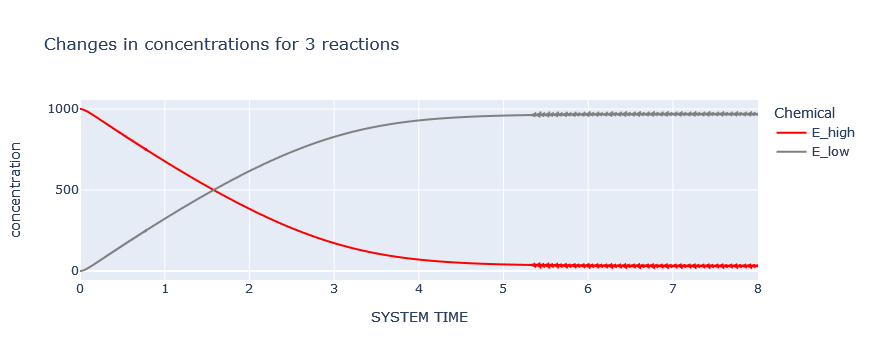

In [16]:
dynamics.plot_curves(chemicals=["E_high", "E_low"], colors=["red", "grey"])

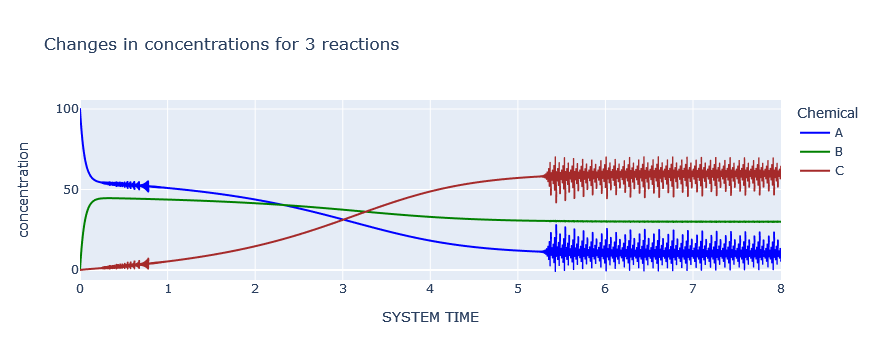

In [17]:
dynamics.plot_curves(chemicals=["A", "B", "C"])

# The negative concentrations were automatically avoided, but nonetheless the plots are ragged... and the solutions display instabilities

## RUN 2 - Same primary steps as for run #1, but with the option of using 1/2 substeps as needed, 
with thresholds that lead to those substeps being actually utilized a fair part of the time.   
The raggedness and instabilities are now eliminated.
(Note: the 1/2 substeps are on a per-reaction basis)

In [18]:
dynamics = ReactionDynamics(reaction_data=chem_data)   # Note: OVER-WRITING the "dynamics" object
dynamics.set_conc(conc=initial_conc, snapshot=True) 
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
5 species:
  Species 0 (A). Conc: 100.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.0
  Species 3 (E_high). Conc: 1000.0
  Species 4 (E_low). Conc: 0.0


In [19]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

In [20]:
#dynamics.verbose_list = [1]     # Uncomment for debugging information

In [21]:
dynamics.single_compartment_react(time_step=0.0012, stop_time=0.03,
                                  dynamic_substeps=2, abs_fast_threshold=750.)
#dynamics.get_history()

single_compartment_react(): setting rel_fast_threshold to 89.99999999999999
The computation took 38 extra step(s) - automatically added to prevent negative concentrations
(an extra dynamic substeps that might have been taken, are NOT part of the above count)
45 total step(s) taken


In [22]:
dynamics.explain_time_advance()

From time 0 to 0.0012, in 2 substeps of 0.0006 (each 1/2 of full step)
From time 0.0012 to 0.0162, in 50 substeps of 0.0003 (each 1/4 of full step)
From time 0.0162 to 0.024, in 13 substeps of 0.0006 (each 1/2 of full step)
From time 0.024 to 0.0312, in 6 FULL steps of 0.0012


### Compared to the earlier run, the system is now at times reaching for smaller 1/4 steps 
(1/2 factors arise from either the negative concentrations or the optional substeps triggered by large changes; sometime both occur)

In [23]:
dynamics.single_compartment_react(time_step=0.0025, stop_time=5.,
                                  dynamic_substeps=2, abs_fast_threshold=250.)
#dynamics.get_history()

single_compartment_react(): setting rel_fast_threshold to 62.5
The computation took 109 extra step(s) - automatically added to prevent negative concentrations
(an extra dynamic substeps that might have been taken, are NOT part of the above count)
2043 total step(s) taken


In [24]:
dynamics.explain_time_advance()

From time 0 to 0.0012, in 2 substeps of 0.0006 (each 1/2 of full step)
From time 0.0012 to 0.0162, in 50 substeps of 0.0003 (each 1/4 of full step)
From time 0.0162 to 0.024, in 13 substeps of 0.0006 (each 1/2 of full step)
From time 0.024 to 0.0312, in 6 FULL steps of 0.0012
From time 0.0312 to 0.0337, in 2 substeps of 0.00125 (each 1/2 of full step)
From time 0.0337 to 0.17, in 218 substeps of 0.000625 (each 1/4 of full step)
From time 0.17 to 0.172, in 1 FULL step of 0.0025
From time 0.172 to 2.28, in 1686 substeps of 0.00125 (each 1/2 of full step)
From time 2.28 to 5, in 1089 FULL steps of 0.0025


### Again, we see many of those smaller 1/4 steps

In [25]:
dynamics.single_compartment_react(time_step=0.008, stop_time=8.,
                                  dynamic_substeps=2, abs_fast_threshold=2.)

single_compartment_react(): setting rel_fast_threshold to 1.6
375 total step(s) taken


In [26]:
df = dynamics.get_history()
df

SYSTEM TIME           A          B          C       E_high       E_low  \
0         0.00000  100.000000   0.000000   0.000000  1000.000000    0.000000   
1         0.00060   99.460000   0.540000   0.000000  1000.000000    0.000000   
2         0.00120   98.923888   1.073520   0.002592  1000.000000    0.000000   
3         0.00150   98.658537   1.337075   0.004388   999.999222    0.000778   
4         0.00180   98.394140   1.599676   0.006183   999.998445    0.001555   
...           ...         ...        ...        ...          ...         ...   
3623      7.97045   10.018391  30.006875  59.974735    32.330220  967.669780   
3624      7.97845   10.018012  30.006785  59.975202    32.329439  967.670561   
3625      7.98645   10.017978  30.006691  59.975330    32.328339  967.671661   
3626      7.99445   10.017485  30.006608  59.975908    32.327699  967.672301   
3627      8.00245   10.017621  30.006514  59.975865    32.326462  967.673538   

                                            caption  
0                                     Initial state  
1     Interm. step, due to the fast rxns: [0, 1, 2]  
2                                                    
3           Interm. step, due to the fast rxns: [0]  
4                                                    
...                                             ...  
3623                                                 
3624                                                 
3625                                                 
3626                                                 
3627                                                 

[3628 rows x 7 columns]

In [27]:
dynamics.explain_time_advance()

From time 0 to 0.0012, in 2 substeps of 0.0006 (each 1/2 of full step)
From time 0.0012 to 0.0162, in 50 substeps of 0.0003 (each 1/4 of full step)
From time 0.0162 to 0.024, in 13 substeps of 0.0006 (each 1/2 of full step)
From time 0.024 to 0.0312, in 6 FULL steps of 0.0012
From time 0.0312 to 0.0337, in 2 substeps of 0.00125 (each 1/2 of full step)
From time 0.0337 to 0.17, in 218 substeps of 0.000625 (each 1/4 of full step)
From time 0.17 to 0.172, in 1 FULL step of 0.0025
From time 0.172 to 2.28, in 1686 substeps of 0.00125 (each 1/2 of full step)
From time 2.28 to 5, in 1089 FULL steps of 0.0025
From time 5 to 6.42, in 354 substeps of 0.004 (each 1/2 of full step)
From time 6.42 to 6.5, in 10 FULL steps of 0.008
From time 6.5 to 6.51, in 2 substeps of 0.004 (each 1/2 of full step)
From time 6.51 to 6.64, in 17 FULL steps of 0.008
From time 6.64 to 6.65, in 2 substeps of 0.004 (each 1/2 of full step)
From time 6.65 to 6.8, in 19 FULL steps of 0.008
From time 6.8 to 6.81, in 2 subs

### In the later times (the 5.-8. range) there isn't that "frantic throttling up and down" that we had before

## Plots of changes of concentration with time

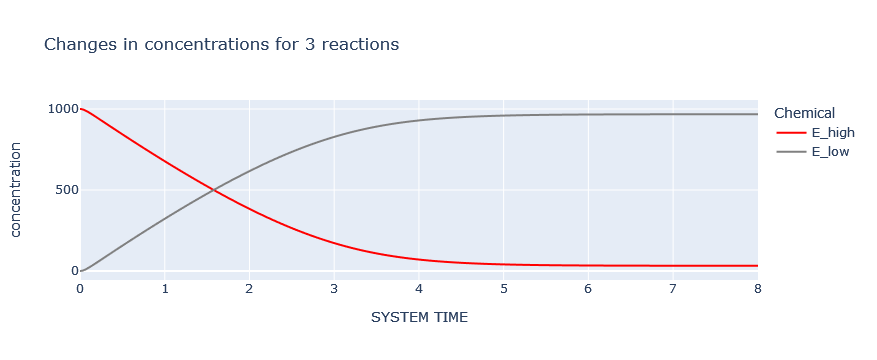

In [28]:
dynamics.plot_curves(chemicals=["E_high", "E_low"], colors=["red", "grey"])

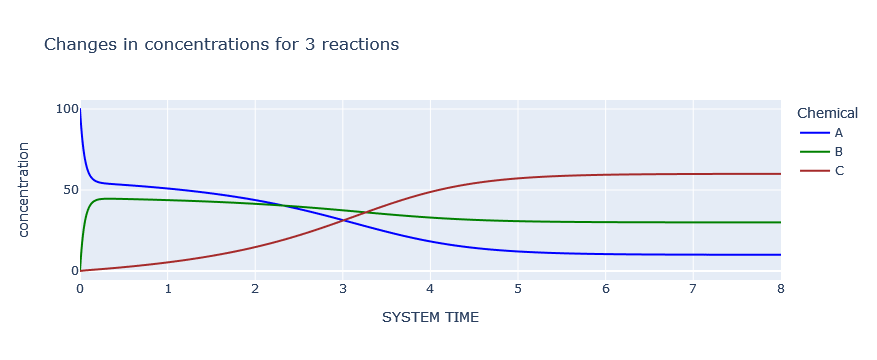

In [29]:
dynamics.plot_curves(chemicals=["A", "B", "C"])

# The raggedness, and instability in the solutions, is now gone :)